Initial exploratory analyses of demographic data

In [29]:
import pandas,numpy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext rpy2.ipython



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [30]:
demog_all=pandas.read_csv('surveydata/demographics.tsv',delimiter='\t')
demog=demog_all.copy()
del demog['RelationshipStatus']
del demog['RentOwn']
demog['WeightPounds'][demog['WeightPounds']<80]=numpy.nan
demog['BMI']=demog['WeightPounds']*0.45 / (demog['HeightInches']*0.025)**2
demog.describe().T

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Sex,163.0,0.490798,0.501456,0.000000,0.0,0.0,1.0,1.000000
Age,163.0,33.766871,8.381763,20.000000,27.0,32.0,39.5,59.000000
HispanicLatino,163.0,0.073620,0.261956,0.000000,0.0,0.0,0.0,1.000000
HighestEducation,163.0,3.460123,0.876619,1.000000,3.0,3.0,4.0,6.000000
HeightInches,163.0,67.552147,4.567942,50.000000,64.0,67.0,71.0,79.000000
WeightPounds,162.0,181.771605,52.510901,98.000000,NaN,NaN,NaN,362.000000
DivorceCount,163.0,0.147239,0.433663,0.000000,0.0,0.0,0.0,2.000000
LongestRelationship,163.0,81.030675,80.335594,0.000000,22.0,50.0,120.0,360.000000
RelationshipNumber,163.0,3.288344,1.665644,0.000000,2.0,3.0,5.0,6.000000
ChildrenNumber,163.0,0.791411,1.204180,0.000000,0.0,0.0,1.0,5.000000


In [53]:
print('Proportion arrested more than once: %f'%numpy.mean(demog.ArrestedChargedLifeCount>0))


Proportion arrested more than once: 0.177914


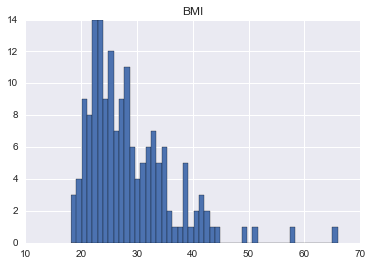

In [50]:
demog.BMI.hist(bins=50)
plt.title('BMI')

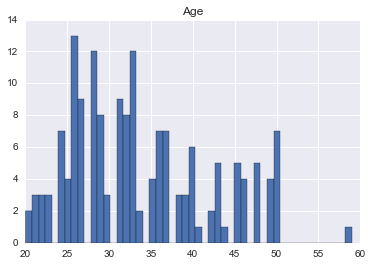

In [51]:
demog.Age.hist(bins=50)
plt.title('Age')

In [42]:
numpy.corrcoef(demog.BMI,demog.CaffienatedSodaCansPerDay)

array([[ nan,  nan],
       [ nan,   1.]])

In [45]:
demog.corr()



,Sex,Age,HispanicLatino,HighestEducation,HeightInches,WeightPounds,DivorceCount,LongestRelationship,RelationshipNumber,ChildrenNumber,...,CoffeeCupsPerDay,TeaCupsPerDay,CaffienatedSodaCansPerDay,CaffieneOtherSourcesDayMG,GamblingProblem,TrafficTicketsLastYearCount,TrafficAccidentsLifeCount,ArrestedChargedLifeCount,OtherDebtAmount,BMI
Sex,1.000000,0.108166,-0.135787,-0.039457,-0.606800,-0.258904,0.119812,0.177677,-0.007889,0.252366,...,0.053558,0.078625,0.034408,0.087164,-0.188672,-0.049281,0.067257,-0.187066,0.016548,0.022630
Age,0.108166,1.000000,-0.009003,0.032332,-0.013223,0.056560,0.391604,0.575717,0.453182,0.334583,...,0.237911,0.053223,0.047632,-0.112283,0.090276,-0.067190,0.358523,0.129903,0.018501,0.079112
HispanicLatino,-0.135787,-0.009003,1.000000,0.039744,0.053517,0.031851,-0.041670,-0.086346,0.007638,-0.127138,...,-0.028978,0.045759,0.010747,-0.099537,0.002883,-0.016722,-0.031489,-0.028912,0.081244,-0.001536
HighestEducation,-0.039457,0.032332,0.039744,1.000000,0.121148,-0.136707,0.031778,-0.124055,0.103044,-0.177511,...,-0.009341,0.094498,-0.154851,-0.063447,-0.059809,-0.142648,-0.081058,-0.142526,-0.018250,-0.244657
HeightInches,-0.606800,-0.013223,0.053517,0.121148,1.000000,0.466057,-0.019480,-0.123682,0.161489,-0.121453,...,-0.053025,-0.033497,-0.086387,-0.046602,0.064757,-0.008667,-0.017059,0.031026,0.060198,-0.038962
WeightPounds,-0.258904,0.056560,0.031851,-0.136707,0.466057,1.000000,0.008835,-0.025931,-0.065752,0.003661,...,-0.079364,0.034833,0.161828,-0.082618,0.082973,0.166562,0.114112,0.031535,0.079330,0.857685
DivorceCount,0.119812,0.391604,-0.041670,0.031778,-0.019480,0.008835,1.000000,0.254660,0.231417,0.319230,...,0.254655,0.079636,0.044414,-0.041476,-0.037066,0.010863,0.215917,0.031660,0.230935,0.016615
LongestRelationship,0.177677,0.575717,-0.086346,-0.124055,-0.123682,-0.025931,0.254660,1.000000,0.181137,0.557124,...,0.214733,-0.033736,0.055915,0.000109,-0.119818,-0.095175,0.147249,-0.041938,0.051896,0.039350
RelationshipNumber,-0.007889,0.453182,0.007638,0.103044,0.161489,-0.065752,0.231417,0.181137,1.000000,0.147120,...,0.220025,0.081554,-0.069984,0.083842,0.055441,-0.139035,0.341739,0.139306,0.089019,-0.164592
ChildrenNumber,0.252366,0.334583,-0.127138,-0.177511,-0.121453,0.003661,0.319230,0.557124,0.147120,1.000000,...,0.243880,0.008340,0.073239,-0.003932,-0.121033,0.019630,0.155961,-0.033139,0.045255,0.067420
